In [1]:
import logging
logging.basicConfig(level=logging.DEBUG)

import PIL.Image
import graphcat.notebook
import numpy
import skimage

import imagecat.notebook

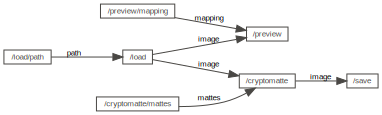

INFO:imagecat.operator:Task /load load:
INFO:imagecat.operator:  layers: *
INFO:imagecat.operator:  path: bunny_CryptoMaterial.exr
INFO:imagecat.operator:  output: Image(uCryptoMaterial.blue: Layer(1280x720x1 float32 [''] Role.NONE), uCryptoMaterial.green: Layer(1280x720x1 float32 [''] Role.NONE), uCryptoMaterial.red: Layer(1280x720x1 float32 [''] Role.NONE), uCryptoMaterial00.alpha: Layer(1280x720x1 float32 [''] Role.NONE), uCryptoMaterial00.blue: Layer(1280x720x1 float32 [''] Role.NONE), uCryptoMaterial00.green: Layer(1280x720x1 float32 [''] Role.NONE), uCryptoMaterial00.red: Layer(1280x720x1 float32 [''] Role.NONE), uCryptoMaterial01.alpha: Layer(1280x720x1 float32 [''] Role.NONE), uCryptoMaterial01.blue: Layer(1280x720x1 float32 [''] Role.NONE), uCryptoMaterial01.green: Layer(1280x720x1 float32 [''] Role.NONE), uCryptoMaterial01.red: Layer(1280x720x1 float32 [''] Role.NONE), uCryptoMaterial02.alpha: Layer(1280x720x1 float32 [''] Role.NONE), uCryptoMaterial02.blue: Layer(1280x720x1 

Accordion(children=(HTML(value=''), HTML(value=''), HTML(value=''), HTML(value='')), _titles={'0': 'Layer: Cry…

In [2]:
mapping = {
    "CryptoPreview": {"channels": ["uCryptoMaterial.red", "uCryptoMaterial.green", "uCryptoMaterial.blue"]},
    "CryptoRank0": {"channels": ["uCryptoMaterial00.red", "uCryptoMaterial00.green"]},
    "CryptoRank1": {"channels": ["uCryptoMaterial00.blue", "uCryptoMaterial00.alpha"]},
}

graph = graphcat.DynamicGraph()
imagecat.add_task(graph, "/load", imagecat.operator.load, path="bunny_CryptoMaterial.exr")
imagecat.add_task(graph, "/preview", imagecat.operator.remap, mapping=mapping)
imagecat.add_task(graph, "/cryptomatte", imagecat.operator.cryptomatte.decoder, mattes=["bunny_porcelain_mat", "flowerA_petal"])
imagecat.add_task(graph, "/save", imagecat.operator.save)

imagecat.add_links(graph, "/load", ("/preview", "image"))
imagecat.add_links(graph, "/load", ("/cryptomatte", "image"))
imagecat.add_links(graph, "/cryptomatte", ("/save", "image"))

graphcat.notebook.display(graph)
imagecat.notebook.display(graph.output("/preview"), height="300px")

In [3]:
imagecat.notebook.display(graph.output("/cryptomatte"))

INFO:imagecat.operator.cryptomatte:Task /cryptomatte cryptomatte.decode:
INFO:imagecat.operator.cryptomatte:  cryptomatte: None
INFO:imagecat.operator.cryptomatte:  layer: matte
INFO:imagecat.operator.cryptomatte:  mattes: ['bunny_porcelain_mat', 'flowerA_petal']
INFO:imagecat.operator.cryptomatte:  output: Image(matte: Layer(1280x720x1 float32 [''] Role.NONE))


Accordion(children=(HTML(value=''),), _titles={'0': 'Layer: matte'})